# Image 출력
우선 배를 가져올 이미지를 출력한다


0005d01c8.jpg


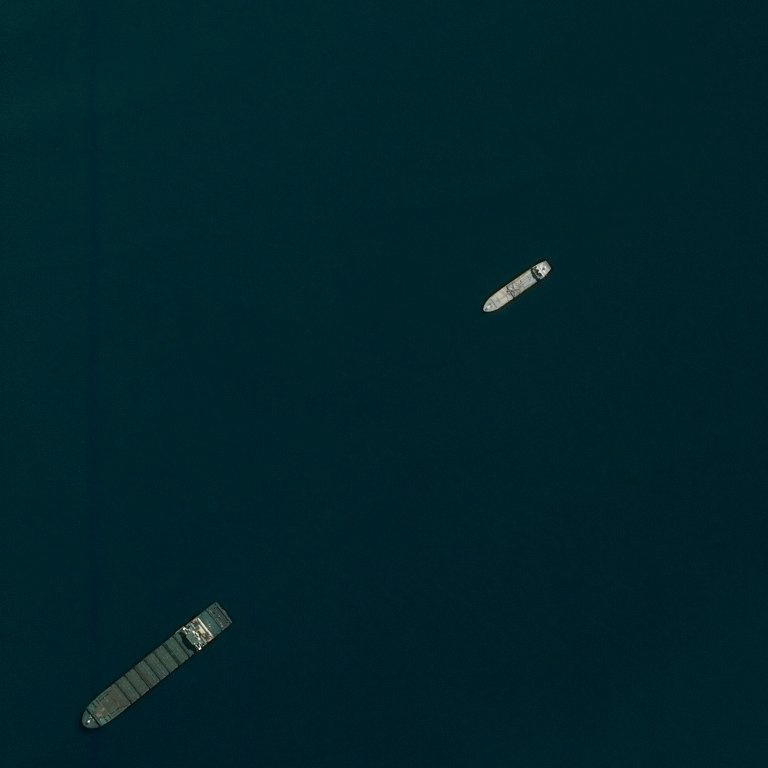

In [5]:
from PIL import Image
import os
path = "Airbus/Object/"
file_list = os.listdir(path)
image_number = 7
im = Image.open("Airbus/Object/" + file_list[image_number])
print(file_list[image_number])
im

# CSV 파일 읽기
image의 어느 부분이 배인지를 알기 위하여 csv파일을 읽어 image의 bounding box좌표를 알아낸다.

In [6]:
import csv
from tqdm import tqdm

im_path = "Airbus/train_v2/"
fr = open('Airbus/train_ship_segmentations_v3.csv','r')
rdr = csv.reader(fr)
csv_dict = {}
for i, line in enumerate(rdr):
    if i > 0:
        try:
            csv_dict[line[0]].append([line[1]])
        except:
            csv_dict[line[0]] = [[line[1]]]

fr.close()


In [7]:
A = list(map(int, csv_dict[file_list[image_number]][0][0].split()))
#A = csv_dict[file_list].split()
print(A)


[56010, 1, 56777, 3, 57544, 6, 58312, 7, 59079, 9, 59846, 11, 60613, 14, 61380, 16, 62148, 17, 62915, 19, 63682, 22, 64449, 24, 65216, 26, 65984, 27, 66751, 30, 67518, 32, 68285, 34, 69052, 36, 69820, 38, 70587, 40, 71354, 42, 72121, 42, 72888, 42, 73656, 42, 74423, 42, 75190, 42, 75957, 42, 76724, 42, 77492, 42, 78259, 42, 79026, 42, 79793, 42, 80560, 42, 81328, 42, 82095, 42, 82862, 42, 83629, 42, 84396, 42, 85164, 42, 85931, 42, 86698, 42, 87465, 42, 88232, 42, 89000, 42, 89767, 42, 90534, 42, 91301, 42, 92068, 42, 92836, 42, 93603, 42, 94370, 42, 95137, 42, 95904, 42, 96672, 42, 97439, 42, 98206, 42, 98973, 42, 99740, 42, 100508, 42, 101275, 42, 102042, 42, 102809, 42, 103576, 42, 104344, 42, 105111, 42, 105878, 42, 106645, 42, 107412, 42, 108180, 42, 108947, 42, 109714, 42, 110481, 42, 111249, 41, 112016, 42, 112783, 42, 113550, 42, 114317, 42, 115085, 41, 115852, 42, 116619, 42, 117386, 42, 118153, 42, 118921, 41, 119688, 42, 120455, 42, 121222, 42, 121989, 42, 122757, 41, 123524

현재 이미지는 masking data이기 때문에 이를 다각형의 좌표로 변환해준다.

In [8]:
import numpy as np

pointL = []
pointR = []
for i in range(0,len(A),2):
    pointL.append([A[i]//768, A[i]%768])
    pointR.append([A[i]//768, (A[i] + A[i+1]) %768])

pointL.sort()
pointR.sort()
pointR.reverse()
point = pointL + pointR + [pointL[0]]
print(point)
point = np.array(point)
pointA = point[0:len(point),0:1]
pointB = point[0:len(point),1:2]



[[72, 714], [73, 713], [74, 712], [75, 712], [76, 711], [77, 710], [78, 709], [79, 708], [80, 708], [81, 707], [82, 706], [83, 705], [84, 704], [85, 704], [86, 703], [87, 702], [88, 701], [89, 700], [90, 700], [91, 699], [92, 698], [93, 697], [94, 696], [95, 696], [96, 695], [97, 694], [98, 693], [99, 692], [100, 692], [101, 691], [102, 690], [103, 689], [104, 688], [105, 688], [106, 687], [107, 686], [108, 685], [109, 684], [110, 684], [111, 683], [112, 682], [113, 681], [114, 680], [115, 680], [116, 679], [117, 678], [118, 677], [119, 676], [120, 676], [121, 675], [122, 674], [123, 673], [124, 672], [125, 672], [126, 671], [127, 670], [128, 669], [129, 668], [130, 668], [131, 667], [132, 666], [133, 665], [134, 664], [135, 664], [136, 663], [137, 662], [138, 661], [139, 660], [140, 660], [141, 659], [142, 658], [143, 657], [144, 657], [145, 656], [146, 655], [147, 654], [148, 653], [149, 653], [150, 652], [151, 651], [152, 650], [153, 649], [154, 649], [155, 648], [156, 647], [157, 6

변환된 좌표를 가지고 bounding box를 한번 쳐보자

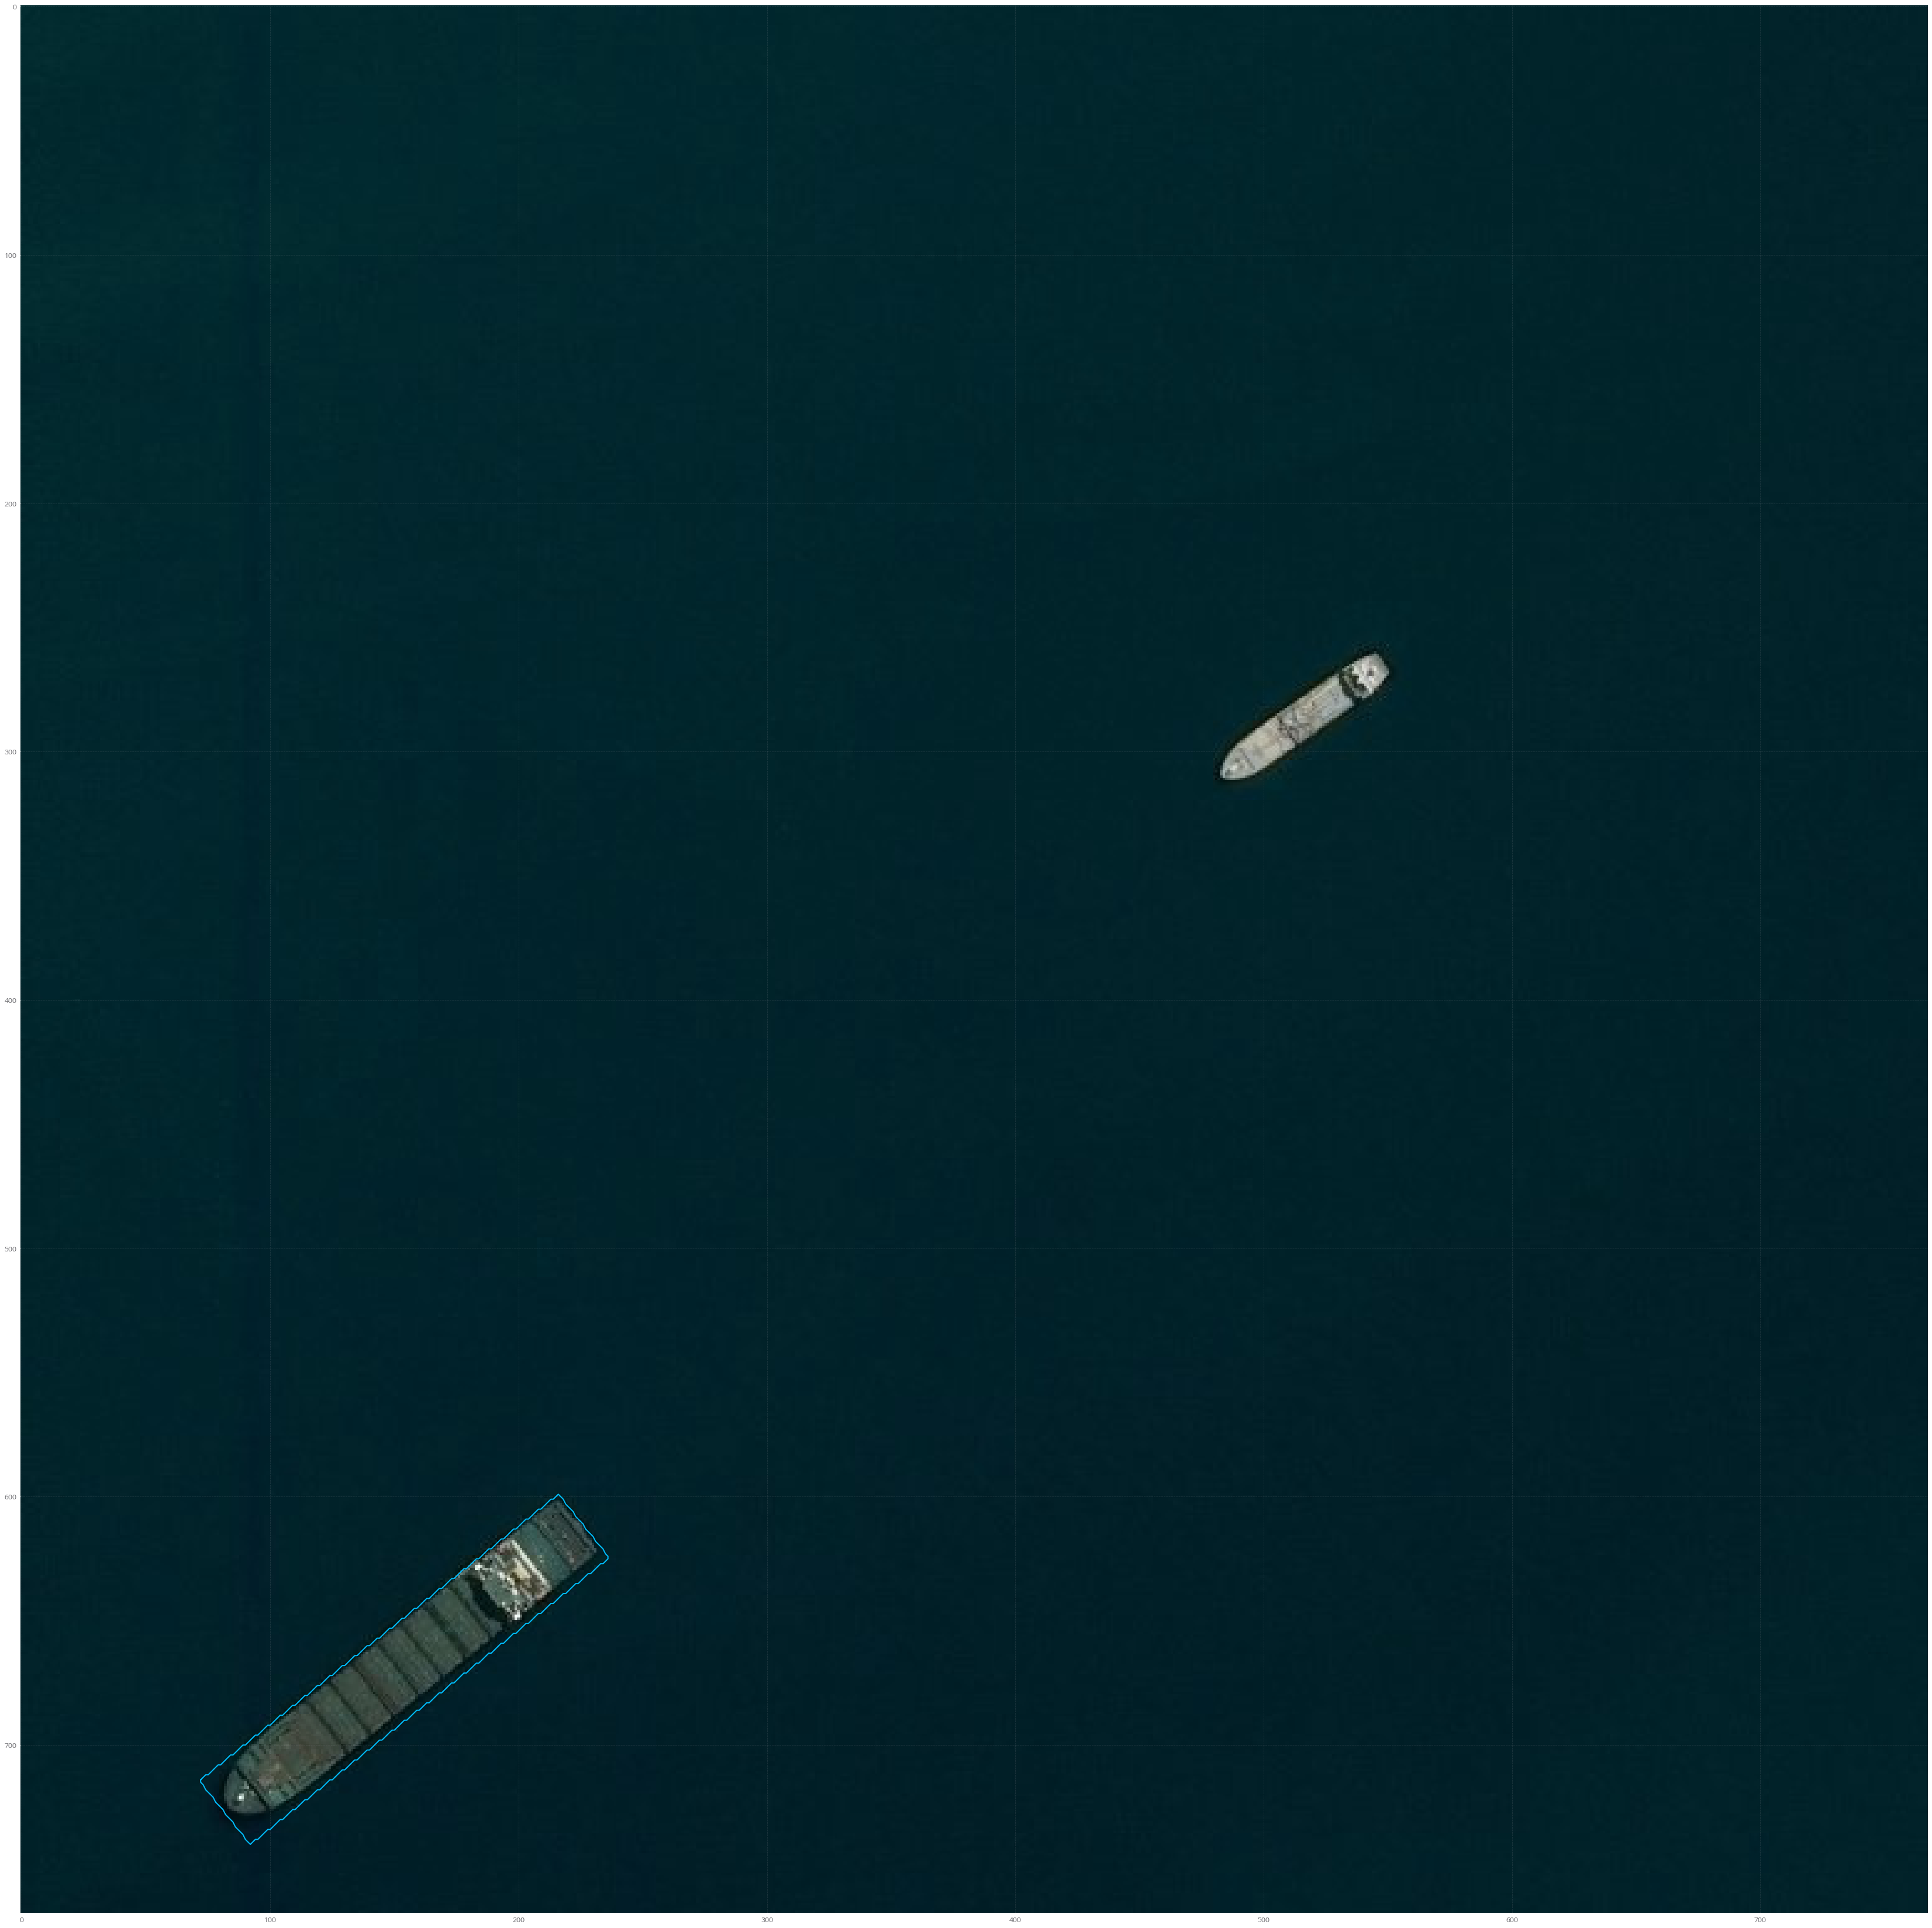

In [18]:
from matplotlib import pyplot as plt
from matplotlib.image import imread

img = imread("Airbus/Object/" + file_list[image_number])
plt.figure(figsize=(60, 60))
plt.plot(pointA, pointB)
plt.imshow(img)
plt.show()


이제 저기 bounding box가 쳐진 부분만 추출해내자

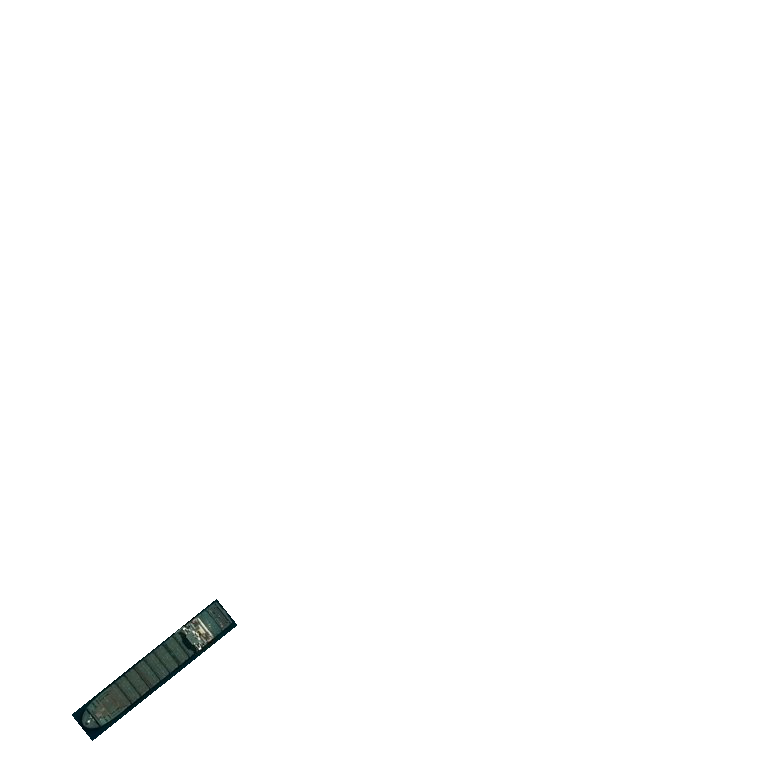

In [37]:
import cv2
from PIL import Image, ImageDraw
#img = imread("Airbus/Object/" + file_list[0])
im = Image.open("Airbus/Object/" + file_list[image_number]).convert("RGBA")

imArray = np.asarray(im)
polygon = []
for i in range(len(pointA)):
    T = (int(pointA[i]),int(pointB[i]))
    polygon.append(T)

maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
mask = np.array(maskIm)
# assemble new image (uint8: 0-255)
newImArray = np.empty(imArray.shape,dtype='uint8')
newImArray[:,:,:3] = imArray[:,:,:3]
newImArray[:,:,3] = mask*255

# back to Image from numpy
newIm = Image.fromarray(newImArray, "RGBA")
# mask2 =cv2.bitwise_not(mask)
# print(mask)
newIm

이제 빈 배경을 준비하자

000303d4d.jpg


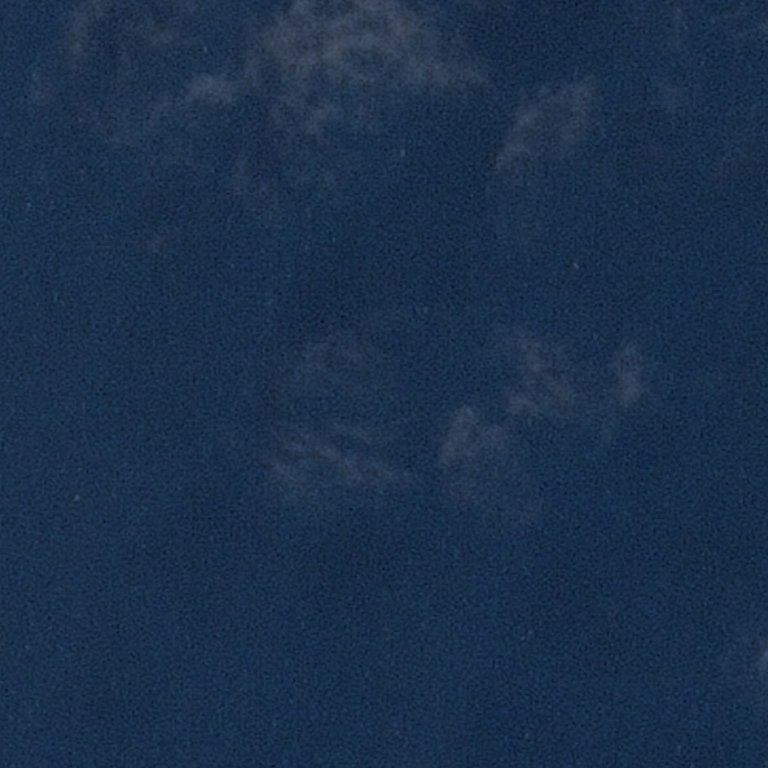

In [38]:
from PIL import Image
import os
path = "Airbus/NotObject/"
file_list2 = os.listdir(path)
empty_im = Image.open(path + file_list2[0]).convert("RGBA")
print(file_list2[4])
empty_im

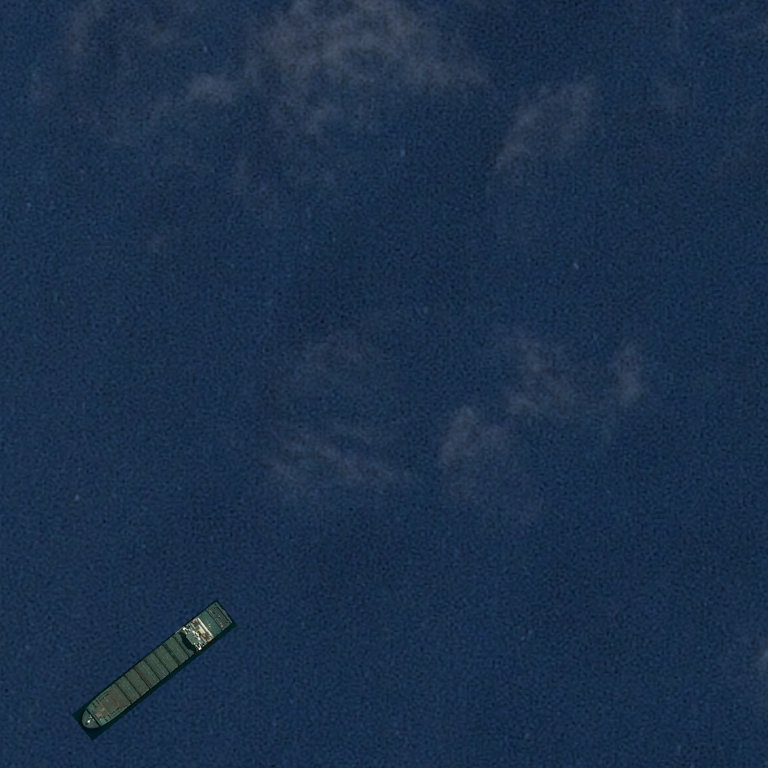

In [39]:


# empty_im.paste(newIm, (0, 0), newIm)
# empty_im.show()

empty_im.paste(newIm, (0, 0), newIm)
empty_im.show()
empty_im

현재 위 그림을 보면 조금 어색함을 알 수 있는데 이 어색함을 줄이기 위하여 추후 harmonization같은 방법을 사용해보자
